In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# raw_df has the data in 2 rows for each real row of data
# the first of the 2 rows contains all data needed for 11 columns
# the second of the 2 rows only contains needed data for 3 columns
# hstack takes these two buckets of data and combines then horizontally into 1 long row of columns
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]
df = pd.DataFrame(data, columns=feature_names)

In [3]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
import statsmodels.api as sm

bos_X = df.drop(["MEDV"], axis=1)
bos_X = sm.add_constant(bos_X)
bos_y = df["MEDV"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
# split the data
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [9]:
# take the original box_X dataset and scale the data with mean 0 and std 1 for each column
bos_sX = StandardScaler().fit_transform(bos_X)

In [10]:
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [11]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

### XGBoost

In [12]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42, base_score=0.5)
xgr.fit(bos_X_train, bos_y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Shapely

In [22]:
sample_idx = 5
xgr.predict(bos_X.iloc[[sample_idx]])

array([28.698956], dtype=float32)

In [23]:
import shap
shap.initjs()

exp=shap.TreeExplainer(xgr)
vals=exp.shap_values(bos_X)
shap.force_plot(
    exp.expected_value,
    vals[sample_idx],
    bos_X.iloc[sample_idx])

In [24]:
shap.force_plot(exp.expected_value, vals, bos_X)

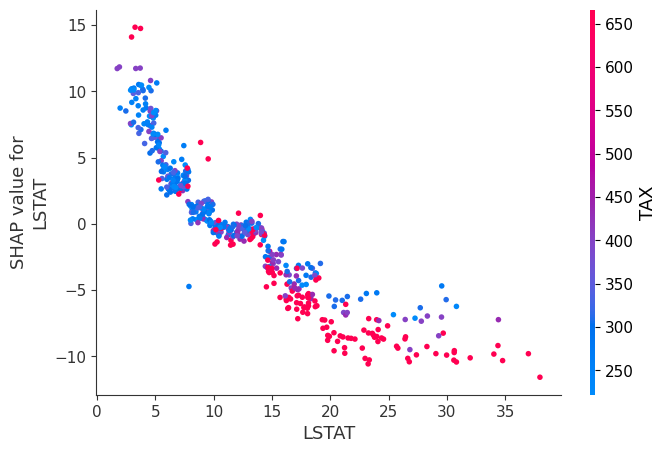

In [19]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,4))
shap.dependence_plot("LSTAT", vals, bos_X)

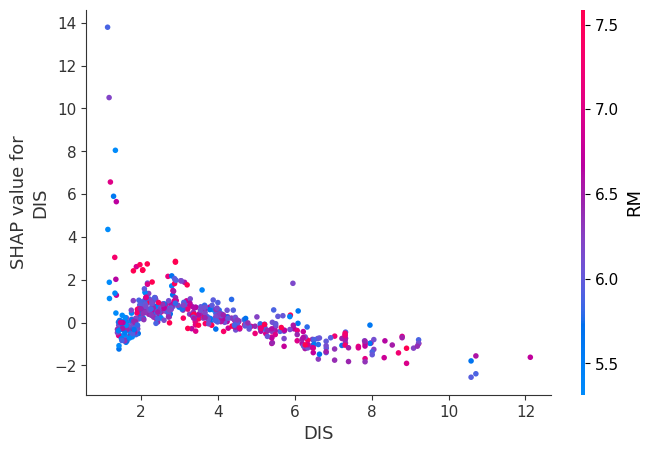

In [20]:
shap.dependence_plot(
    "DIS", vals, bos_X, interaction_index="RM")

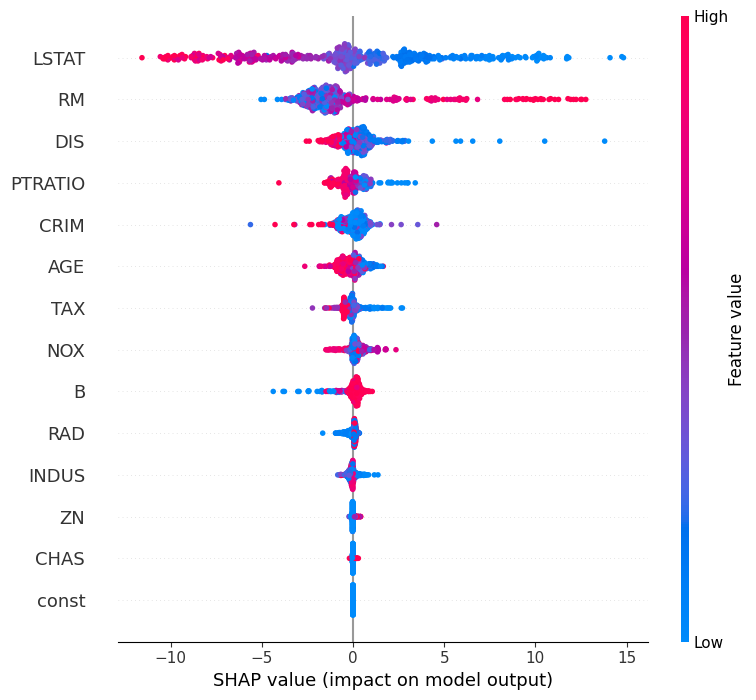

In [21]:
shap.summary_plot(vals, bos_X)